# Calculating the weights of the points for disc-averaged observations

In this example, we show how archNEMESIS can be used to calculate the points to calculate the effective radiance in disc-averaged observations, in which the planet is not spatially resolved. We perform these calculations using the methodology presented by [Irwin et al. (2020)](https://doi.org/10.1093/mnras/staa238). In their formulation, the disc-averaged radiance of a planet can be calculated using

\begin{equation}
\bar{R} = \dfrac{1}{\pi} \int_{\phi=0}^{2\pi} \int_{\mu=0}^1 R(\mu,\phi) \mu d\mu d\phi,
\end{equation}

where $R(\mu,\phi)$ is the radiance at across the disk and $\mu = \cos \theta$ and $\phi$ are the spherical coordinates. The integral across $\mu$ is computed numerically using the Gauss-Lobatto quadrature scheme, while the integration across the azimuth direction is performed using the trapezoidal rule. 

In [1]:
import archnemesis as ans
import numpy as np
import matplotlib.pyplot as plt

## 1. Exoplanets

In this version of the averaging point calculations, the only difference resides in the way the stellar angles (zenith and azimuth angles), as well as the observed latitude and longitudes are calculated. Specifically, what we define is the orbital phase, and the planet is assumed to be tidally-locked. The orbital phase at 0 degrees corresponds to the primary transit, while 180 degrees corresponds to secondary eclipse.

In this example, we are going to assume we have measurements of the disc-averaged spectrum of the exoplanet at different phases. The number of observations at different phases will be defined by the NGEOM parameter, while the number of averaging points used to reconstruct the effective radiance from the planet will be defined by NAV[IGEOM]. Then, for each averaging point the following parameters will be automatically calculated:

- EMISS_ANG: Emission angle of each averaging point.
- SOL_ANG: Stellar zenith angle of each averaging point.
- AZI_ANG: Stellar azimuth angle of each averaging point.
- FLAT: Latitude of each averaging point.
- FLON: Longitude of each averaging point.
- WGEOM: Weight of each averaging point for the correct integration of the radiance across the solid angle extended by the planet.

PHASE =  180.0
PHASE =  210.0
PHASE =  240.0
PHASE =  270.0
PHASE =  300.0
PHASE =  330.0


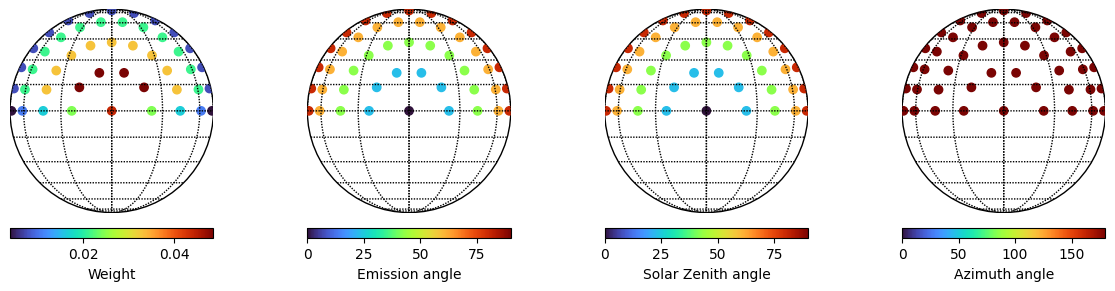

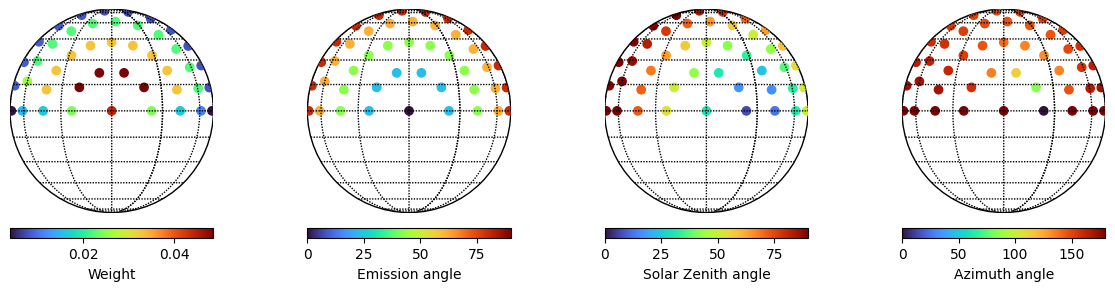

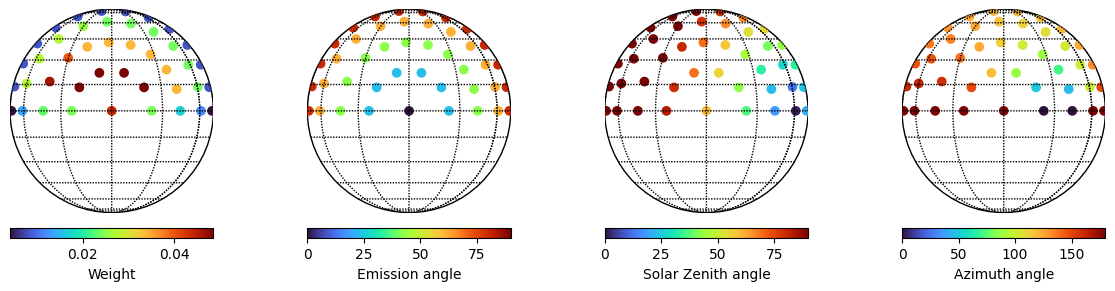

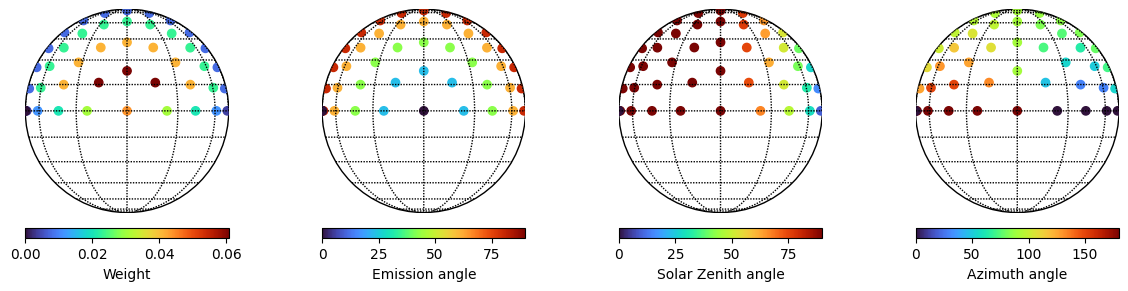

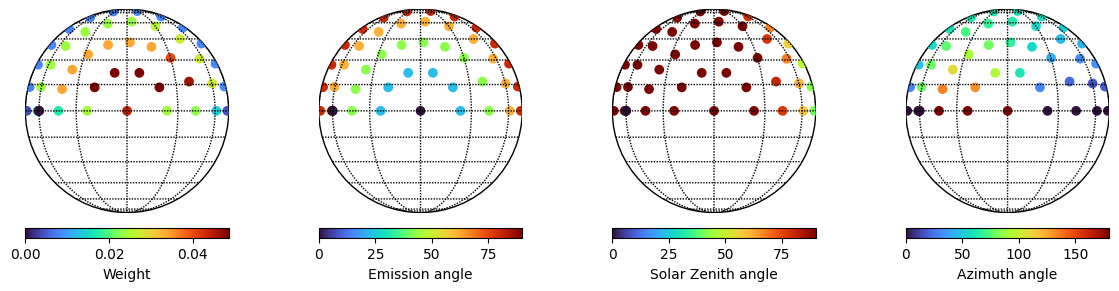

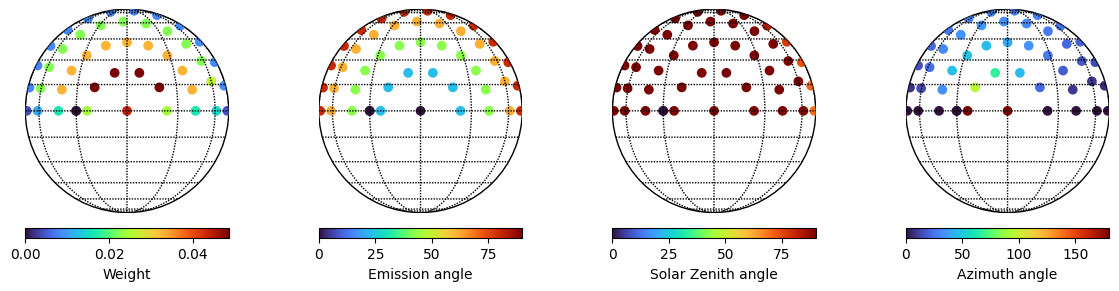

In [3]:
#Initialise the Measurement class
Measurement = ans.Measurement_0()

#Define the number of measurements at different phases
PHASES = np.arange(180.,360.,30.)  #From 270 (illuminated sideways) to 360 (primary transit)
Measurement.NGEOM = len(PHASES)

for igeom in range(Measurement.NGEOM):
    print("PHASE = ",PHASES[igeom])
    Measurement.calc_avepoints_exoplanet(nmu=5,phase=PHASES[igeom],igeom=igeom)

Measurement.plot_fov()
